# Exploring categorical variables

In this Notebook we will explore relations with categorical (qualitative) variables. We will use a data set on apps on Google Play. This is a sample of the total data set.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplay.csv')
df.head()

,app,installs,type,content,genre,version,reviews,rating,size,price
0,Diário Escola Mestres EF,"1,000+",Free,Everyone,Education,4.0 and up,11,NaN,6.6,0
1,WeFi - Free Fast WiFi Connect & Find Wi-Fi Map,"1,000,000+",Free,Everyone,Communication,4.0 and up,13469,4,5.1,0
2,Discovery K!ds Play! Español,"1,000,000+",Free,Everyone,Entertainment;Music & Video,4.0.3 and up,11263,4.2,35,0
3,Skyscanner,"10,000,000+",Free,Everyone,Travel & Local,4.4 and up,481546,4.5,29,0
4,Skyscanner,"10,000,000+",Free,Everyone,Travel & Local,4.4 and up,481546,4.5,29,0


Which of these are categorical?
* app (strictly speaking)
* installs (even though it seems numerical, it's really categorical. We can't calculate a mean, for instance)
* type
* content
* genre
* version

A simple overview of a single variable can be easily done using Pandas' *value_counts*.

In [2]:
pd.value_counts(df["type"])

Free    1270
Paid      68
type       1
Name: type, dtype: int64

Let's say we are interested to know whether paid apps are marketed more towards mature audiences. We can make a crosstab of the two variables.

In [3]:
pd.crosstab(df["content"], df["type"])

type,Free,Paid,type
content,,,
Everyone,954,56,0
Everyone 10+,82,4,0
Mature 17+,66,0,0
Teen,168,8,0
content,0,0,1


It's hard to compare the different categories using absolute numbers. Let's use *normalized* data (in proportions):

In [9]:
pd.crosstab(df["type"],df["content"], normalize="columns")

content,Everyone,Everyone 10+,Mature 17+,Teen,content
type,,,,,
Free,0.944554,0.953488,1.0,0.954545,0.0
Paid,0.055446,0.046512,0.0,0.045455,0.0
type,0.000000,0.000000,0.0,0.000000,1.0


All types of users have roughly the same distribution of Free/Paid content. *Column percentages* might also be useful (it's just proportions x 100). For your exercise, look up the documentation for this function and see if you can find out how.

This is a sample, so what conclusion can we draw for the population? In addition to the percentages, we need to take into account sample size. Percentages can easily shift with small numbers, e.g. 3/44 is a big difference from 2/43. So we can't draw any firm conclusions. However, it seems fair to say that paid apps are possibly marketed more towards a general audience.

Let's make a bar chart out of this data:

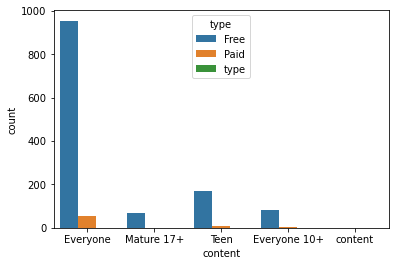

In [5]:
sns.countplot(x="content", hue="type", data=df)
plt.show()

This is a bar chart. In Seaborn this is a type of [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html). In the documentation (linked here) you can find all kinds of options.

The syntax is interesting here. The arguments are the different columns of the Pandas data frame. The same principle is applied in the [catplot](https://seaborn.pydata.org/tutorial/categorical.html). This type of plot includes all kinds of ways to investigate the relation between a *categorical* and a *numerical* variable.

In [10]:
sns.catplot(x="type", y="size", kind="violin", data=df)
plt.title('File size of Google Play apps')
plt.show()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

This *violin plot* (with box plot inside) shows that the distribution of the file size of free and paid apps is broadly similar, but that there are a bit more big free apps. Let's plot the actual data on it to learn more. A *swarmplot* plots the actual data points.

In [ ]:
sns.catplot(x="type", y="size", kind="violin", data=df)
sns.swarmplot(x="type", y="size", size=3, color="k", data=df)
plt.title('File size of Google Play apps')
plt.show()

The actual data support our interpretation that there might be more large free apps in the population (e.g., Facebook). Plus, it shows the limitations of the density model that is used for the violin plots. Obviously, file size can't go below zero. But the model doesn't know this.